In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

In [2]:
def LVmodel(y, t, alpha, beta, gamma, delta):
    u, v = y
    dydt = [(alpha-beta*v)*u, (-gamma+delta*u)*v]
    return dydt

def min_func(x, *args):
    t = args[0]
    u_e = args[1]
    v_e = args[2]
    
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    delta = x[3]

    y0 = [u_e[0], v_e[0]]
    y = odeint(LVmodel, y0, t, args=(alpha, beta, gamma, delta))
    delta = np.sum((y[:, 0]-u_e)**2)+np.sum((y[:, 1]-v_e)**2)
    return delta

def ODE(y, t, alpha, beta, gamma, delta):
    u, v, u_a, u_b, u_g, u_d, v_a, v_b, v_g, v_d = y
    dydt = [
        (alpha-beta*v)*u,
        (-gamma+delta*u)*v,
        
        u+(alpha-beta*v)*u_a+(-beta*u)*v_a,
        -v*u+(alpha-beta*v)*u_b+(-beta*u)*v_b,
        (alpha-beta*v)*u_g+(-beta*u)*v_g,
        (alpha-beta*v)*u_d+(-beta*u)*v_d,
        
        delta*v*u_a+(-gamma+delta*u)*v_a,
        delta*v*u_b+(-gamma+delta*u)*v_b,
        -v+delta*v*u_g+(-gamma+delta*u)*v_g,
        u*v+delta*v*u_d+(-gamma+delta*u)*v_d,
        ]
    return dydt

def min_func_jac(x, *args):
    t = args[0]
    u_e = args[1]
    v_e = args[2]
    
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    delta = x[3]
    
    theta0 = [u_e[0], v_e[0], 0, 0, 0, 0, 0, 0, 0, 0]

    zzz = odeint(ODE, y0=theta0, t=t, args=(alpha, beta, gamma, delta))
    res = np.zeros((4))
    for i in range(0, 4):
        res[i] += np.sum((zzz[:,0]-u_e)*zzz[:,2+i])
        res[i] += np.sum((zzz[:,1]-v_e)*zzz[:,2+4+i])
        res[i] *= 2
    return res

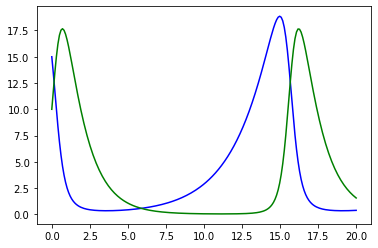

In [3]:
ts = 0
te = 20
n = 200
t = np.linspace(ts, te, n)

alpha = 0.42
beta = 0.14
gamma = 0.79
delta = 0.17


y0 = [15, 10]

sol = odeint(LVmodel, y0, t, args=(alpha, beta, gamma, delta))
u_e = sol[:, 0]
v_e = sol[:, 1]
plt.plot(t, sol[:, 0], 'b')
plt.plot(t, sol[:, 1], 'g')

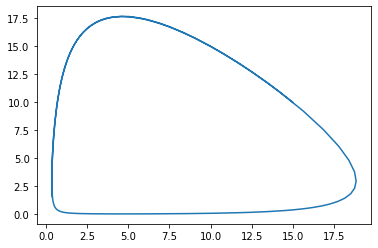

In [4]:
plt.plot(sol[:, 0], sol[:, 1])
prcnt = 0.05
u_e += prcnt*sol[:, 0]*np.random.randn(n)
v_e += prcnt*sol[:, 1]*np.random.randn(n)

In [5]:
for i in range(0, 10):
    rand_x0 = np.random.rand(4)
    print('x0 = ', rand_x0)
    res = minimize(fun=min_func, x0=rand_x0, args=(t, u_e, v_e), method='Nelder-Mead', tol=1e-3)
    print('x = ', res.x)
    print('err = ', res.fun)
    print('nit = ', res.nit)
    print()

x0 =  [0.83002189 0.04635693 0.00166582 0.70189872]
x =  [-121.18045754    4.79127443    0.45545212    9.13316168]
err =  14281.98391164951
nit =  208

x0 =  [0.99589983 0.71842587 0.53513513 0.04274412]


C:\Users\nikit\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


x =  [1.01441204 0.20847043 0.93869213 0.17662013]
err =  9179.838640736933
nit =  311

x0 =  [0.93331361 0.45734853 0.26783554 0.60558493]
x =  [0.06762024 0.05944647 1.66641581 0.21213315]
err =  10359.347179254324
nit =  315

x0 =  [0.27804124 0.84416012 0.90790398 0.87722811]
x =  [0.42067568 0.13867403 0.79699532 0.16985022]
err =  45.488178904048056
nit =  320

x0 =  [0.19093498 0.26708222 0.3715912  0.1131894 ]
x =  [0.06763293 0.05943779 1.66649117 0.21213902]
err =  10359.347191792354
nit =  127

x0 =  [0.36091253 0.21669664 0.4938652  0.71330732]
x =  [0.06768436 0.05946371 1.66597173 0.21208915]
err =  10359.34747130862
nit =  209

x0 =  [0.75684528 0.45935885 0.75583293 0.92584292]
x =  [0.06766905 0.05944557 1.66574844 0.21206313]
err =  10359.347300304355
nit =  213

x0 =  [0.13771107 0.50434714 0.96729186 0.22798781]
x =  [0.42053898 0.13862703 0.7971011  0.16982433]
err =  45.48735944724143
nit =  366

x0 =  [0.27451208 0.20096524 0.89080655 0.97343797]
x =  [0.06765374

In [6]:
for i in range(0, 10):
    rand_x0 = np.random.rand(4)
    print('x0 = ', rand_x0)
    res = minimize(fun=min_func, x0=rand_x0, args=(t, u_e, v_e), method='TNC', jac=min_func_jac)
    print('x = ', res.x)
    print('err = ', res.fun)
    print('nit = ', res.nit)
    print()

x0 =  [0.89964596 0.92251575 0.26255496 0.55174576]


C:\Users\nikit\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


x =  [0.06746934 0.05940291 1.67136129 0.21270979]
err =  10359.359343664064
nit =  21

x0 =  [0.49361693 0.12082874 0.66434999 0.39821203]
x =  [0.42137656 0.13881553 0.7951798  0.16953684]
err =  45.4951071898936
nit =  23

x0 =  [0.50287515 0.79042994 0.35961349 0.22035927]
x =  [0.06764042 0.05944975 1.66608934 0.21208943]
err =  10359.34701548114
nit =  19

x0 =  [0.12807939 0.52917179 0.0997256  0.69640133]
x =  [0.06764059 0.05944979 1.66608354 0.21208872]
err =  10359.347015479305
nit =  21

x0 =  [0.24126038 0.43739642 0.15233807 0.95044048]
x =  [0.06764391 0.05945063 1.66609583 0.21209191]
err =  10359.347018781662
nit =  22

x0 =  [0.92008453 0.9598509  0.85957268 0.54030223]
x =  [0.44524541 0.14980735 0.77669352 0.17265572]
err =  61.67991553390293
nit =  22

x0 =  [0.21801594 0.86067134 0.6160001  0.55358035]
x =  [0.06764044 0.05944974 1.66608434 0.21208874]
err =  10359.34701548169
nit =  22

x0 =  [0.51605309 0.54869009 0.39581392 0.07104838]
x =  [0.06764053 0.059449

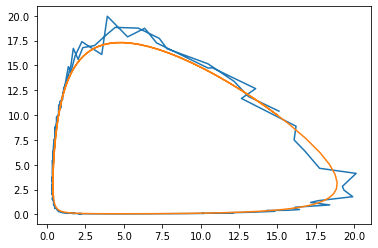

In [7]:
xn = [0.41572561, 0.13543324, 0.76847345, 0.16055372]
tn = np.linspace(0, 80, 400)
sol_new = odeint(LVmodel, y0, t, args=(xn[0], xn[1], xn[2], xn[3]))


plt.plot(sol[:, 0], sol[:, 1])
plt.plot(sol_new[:, 0], sol_new[:, 1])